<a href="https://colab.research.google.com/github/ChiaFengHong/MLMCUT/blob/master/cluster0614.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

In [0]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df['cluster'] = cluster.labels_
df

In [0]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

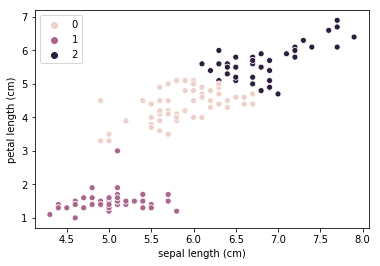

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
x = df[ ['sepal length (cm)', 'petal length (cm)'] ]
cluster = KMeans(n_clusters=3)
cluster.fit(x)
sns.scatterplot(df['sepal length (cm)'], df['petal length (cm)'], 
                hue=cluster.labels_)

In [0]:
from sklearn.metrics import silhouette_score
xs = []
ys = []
for k in range(2,10):
  cluster = KMeans(n_clusters=k)
  cluster.fit(iris["data"])
  score = silhouette_score(iris['data'], cluster.labels_)
  xs.append(k)
  ys.append(score)
print(xs)
print(ys)

[2, 3, 4, 5, 6, 7, 8, 9]
[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3648340039670018, 0.3497481621161199, 0.35974549238457515, 0.3401464883891826]


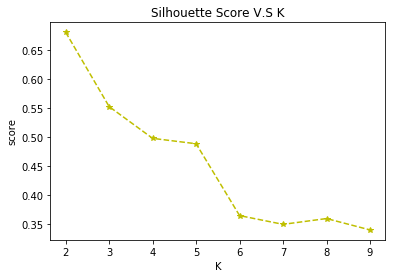

In [0]:
plt.title('Silhouette Score V.S K')
plt.xlabel('K')
plt.ylabel('score')
plt.plot(xs, ys, '*--y')